<a href="https://colab.research.google.com/github/ManalSaad2/portfolio1/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px

In [2]:
df=pd.read_csv("/content/Selfie_Related_Injuries.csv")

In [3]:

df.head()

,Date,Country,Injuries/Casualties,Type,Description
0,10/15/2011,United States,3,Transport,Three teenagers (two sisters and a friend) wer...
1,3/1/2014,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...
2,3/1/2014,Russia,1,Transport,Two people were walking near train tracks when...
3,4/1/2014,United States,1,Transport,A 32-year-old woman from North Carolina was dr...
4,4/22/2014,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 192 non-null    object
 1   Country              192 non-null    object
 2   Injuries/Casualties  192 non-null    int64 
 3   Type                 192 non-null    object
 4   Description          192 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.6+ KB


In [5]:
df["Date"]=pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 192 non-null    datetime64[ns]
 1   Country              192 non-null    object        
 2   Injuries/Casualties  192 non-null    int64         
 3   Type                 192 non-null    object        
 4   Description          192 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 7.6+ KB


In [7]:
df.describe().round(2)

,Date,Injuries/Casualties
count,192,192.00
mean,2016-11-20 13:15:00,1.83
min,2011-10-15 00:00:00,1.00
25%,2015-11-01 00:00:00,1.00
50%,2016-08-08 00:00:00,1.00
75%,2017-07-26 00:00:00,2.00
max,2021-08-06 00:00:00,48.00
std,NaN,3.63


<Axes: ylabel='Injuries/Casualties'>

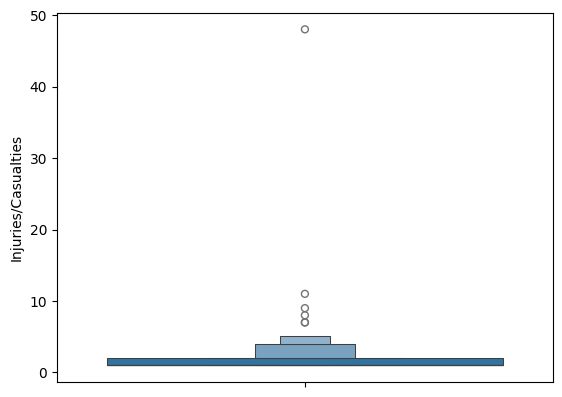

In [8]:
sns.boxenplot(df["Injuries/Casualties"])

In [9]:
df["Injuries/Casualties"].sort_values(ascending=False)

,Injuries/Casualties
141,48
189,11
187,9
140,8
22,7
...,...
184,1
186,1
188,1
190,1


In [10]:
df.iloc[141, ]

,141
Date,2017-07-16 00:00:00
Country,India
Injuries/Casualties,48
Type,Fire
Description,48 people were injured when standing too close...


In [11]:
df.drop(index=141,inplace=True)

In [12]:
df.isnull().sum()

,0
Date,0
Country,0
Injuries/Casualties,0
Type,0
Description,0


In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
print("The Size / Shape Dataset = ",df.shape)

The Size / Shape Dataset =  (191, 5)


In [15]:
df["Country"].value_counts(normalize=True) * 100

,proportion
Country,
India,36.649215
United States,9.424084
Russia,7.329843
Pakistan,4.188482
Spain,2.617801
Brazil,2.617801
Australia,2.617801
Philippines,2.617801
Italy,2.094241


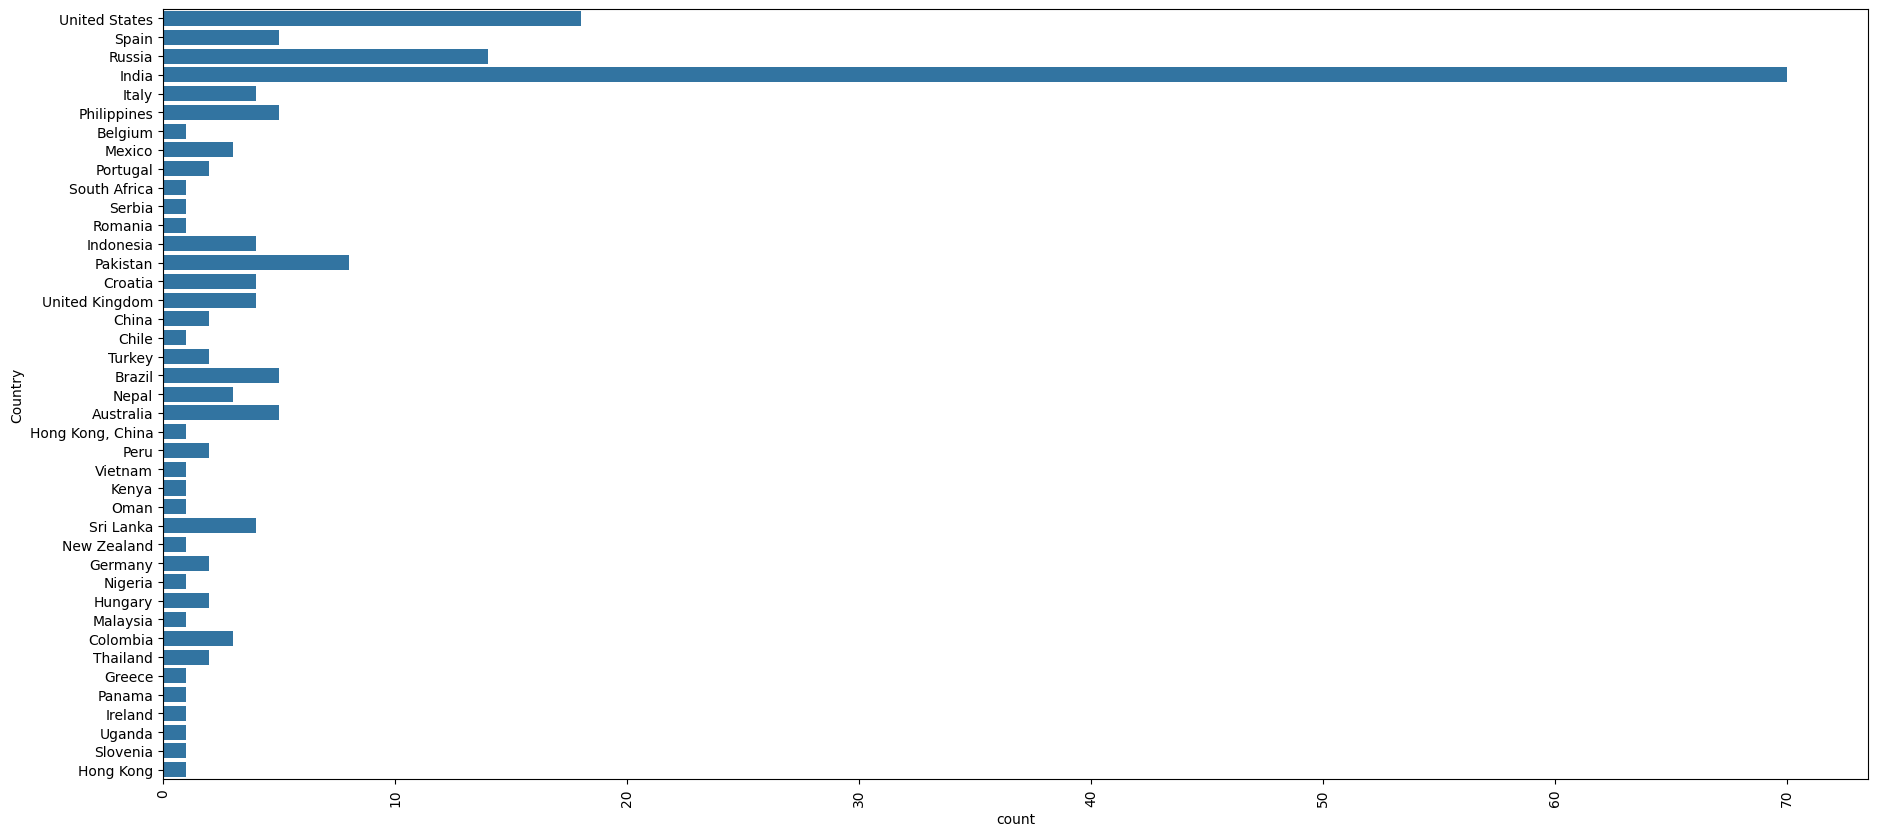

In [16]:
plt.figure(figsize=(22,10))
sns.countplot(df["Country"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='count', ylabel='Type'>

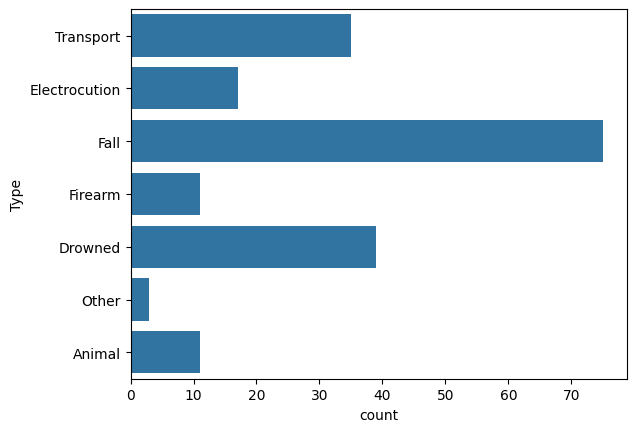

In [17]:
sns.countplot(df["Type"])

In [18]:
df['Injuries/Casualties'].sum()

np.int64(304)

<Axes: xlabel='Date', ylabel='Injuries/Casualties'>

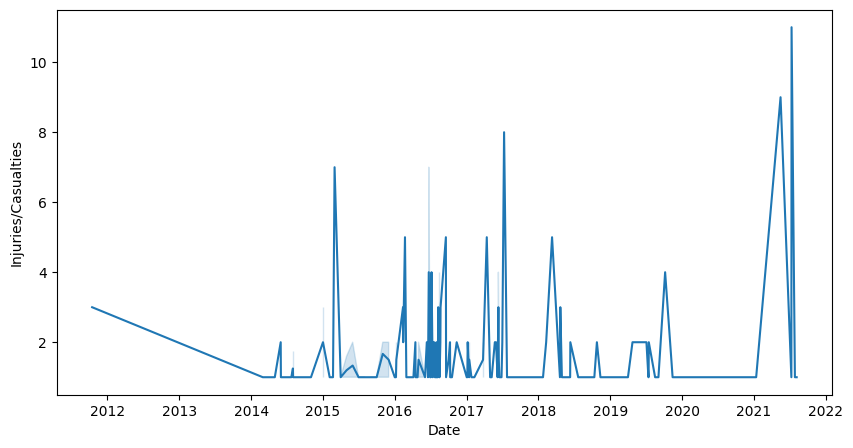

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(x="Date",y="Injuries/Casualties",data=df)

<Axes: xlabel='Date', ylabel='Injuries/Casualties'>

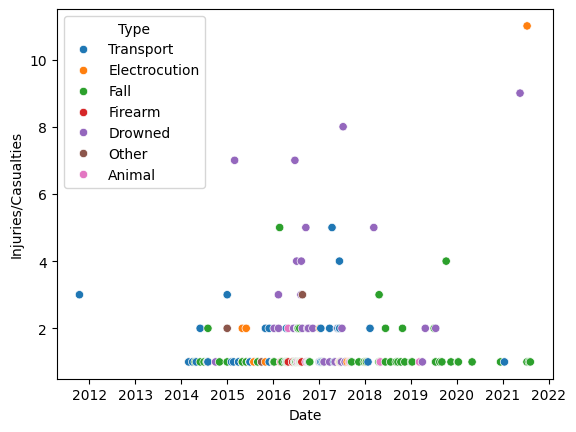

In [20]:
sns.scatterplot(x="Date",y="Injuries/Casualties",data=df,hue="Type")

In [21]:
hight=df.groupby("Country")["Injuries/Casualties"].sum()
hight.sort_values(ascending=False,inplace=True)

<Axes: xlabel='Country'>

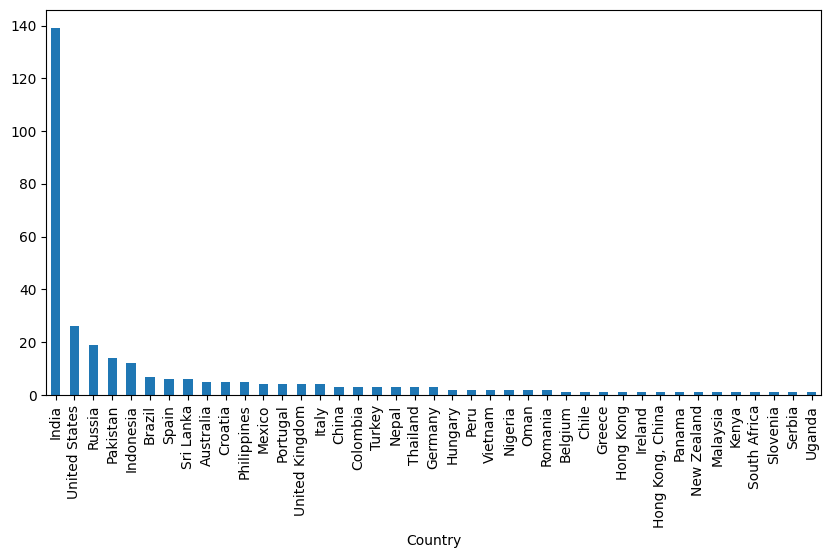

In [22]:
hight.plot(kind="bar",figsize=(10,5))

In [23]:
hight_type = df.groupby("Type")["Injuries/Casualties"].sum().sort_values(ascending=False)
hight_type

,Injuries/Casualties
Type,
Drowned,98
Fall,90
Transport,57
Electrocution,30
Animal,12
Firearm,11
Other,6


In [25]:
m=df.groupby(['Type','Country'])['Injuries/Casualties'].sum()
m=m.reset_index()
m

,Type,Country,Injuries/Casualties
0,Animal,China,2
1,Animal,India,4
2,Animal,Kenya,1
3,Animal,Nepal,1
4,Animal,Spain,1
...,...,...,...
72,Transport,Thailand,2
73,Transport,Turkey,2
74,Transport,United Kingdom,1
75,Transport,United States,8


In [26]:
m[m['Type']=="Animal"]

,Type,Country,Injuries/Casualties
0,Animal,China,2
1,Animal,India,4
2,Animal,Kenya,1
3,Animal,Nepal,1
4,Animal,Spain,1
5,Animal,United States,3


In [27]:
Transport= m[m['Type']=="Transport"]
Transport

,Type,Country,Injuries/Casualties
62,Transport,Belgium,1
63,Transport,Germany,1
64,Transport,India,24
65,Transport,Mexico,2
66,Transport,Pakistan,1
67,Transport,Philippines,1
68,Transport,Russia,5
69,Transport,Serbia,1
70,Transport,Slovenia,1
71,Transport,Sri Lanka,5


In [28]:
df["Day"]=df["Date"].dt.day_name()

In [29]:
df.head()

,Date,Country,Injuries/Casualties,Type,Description,Day
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...,Saturday
1,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...,Saturday
2,2014-03-01,Russia,1,Transport,Two people were walking near train tracks when...,Saturday
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...,Tuesday
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...,Tuesday


In [30]:
df.groupby("Day")["Injuries/Casualties"].sum().sort_values(ascending=False)

,Injuries/Casualties
Day,
Sunday,71
Saturday,53
Wednesday,46
Tuesday,38
Friday,38
Monday,31
Thursday,27


In [31]:
df["Year"]=df["Date"].dt.year

In [32]:
df.head()

,Date,Country,Injuries/Casualties,Type,Description,Day,Year
0,2011-10-15,United States,3,Transport,Three teenagers (two sisters and a friend) wer...,Saturday,2011
1,2014-03-01,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...,Saturday,2014
2,2014-03-01,Russia,1,Transport,Two people were walking near train tracks when...,Saturday,2014
3,2014-04-01,United States,1,Transport,A 32-year-old woman from North Carolina was dr...,Tuesday,2014
4,2014-04-22,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...,Tuesday,2014


In [33]:
df['Year'].value_counts()

,count
Year,
2016,62
2017,37
2015,35
2018,17
2014,16
2019,13
2021,6
2020,4
2011,1


In [34]:
df.groupby("Year")["Injuries/Casualties"].sum()

,Injuries/Casualties
Year,
2011,3
2014,18
2015,49
2016,102
2017,59
2018,26
2019,19
2020,4
2021,24
